In [ ]:
### Import all the required python modules

In [46]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import LabelEncoder
import pydotplus
from IPython.display import Image

In [2]:
### Load and understand the data 

In [47]:
# Load the dataset (Source Kaggle.com, Credit Card Fraud Data)
df = pd.read_csv('/Users/pradyumna/pradyapps/bits/3rd-sem/data-science/assignment2/creditcard-fraud-data.csv')

# Get number of rows and columns in the dataset
display_shape = df.shape


In [48]:
# Display the first few rows and columns in the dataset
df.head()


,id,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,21/06/2020 12:14,2.291160e+15,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,19/03/1968,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,21/06/2020 12:14,3.573030e+15,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",17/01/1990,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,21/06/2020 12:14,3.598220e+15,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",21/10/1970,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,21/06/2020 12:15,3.591920e+15,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,25/07/1987,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,21/06/2020 12:15,3.526830e+15,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,06/07/1955,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [37]:
### Prepare the data

In [49]:
# Drop non-numeric columns and not-required fields
non_numeric_cols = ['trans_date_trans_time', 'first', 'last', 'cc_num', 'trans_num', 'dob']
df = df.drop(columns=non_numeric_cols)

# Define categorical columns for label encoding
categorical_cols = ['merchant', 'category', 'gender', 'street', 'city', 'state', 'job']

# Encode categorical variables using Label Encoding
label_encoders = {}
for col in categorical_cols:
    label_encoders[col] = LabelEncoder()
    df[col] = label_encoders[col].fit_transform(df[col])

# Split data into features and target
X = df.drop('is_fraud', axis=1)
y = df['is_fraud']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)



In [11]:
### Create and build the machine learning model

In [50]:
# Create and train the Decision Tree model
model = DecisionTreeClassifier()
model.fit(X_train, y_train)


DecisionTreeClassifier()

In [51]:

# Make predictions
y_pred = model.predict(X_test)

In [13]:
### Visualize the results

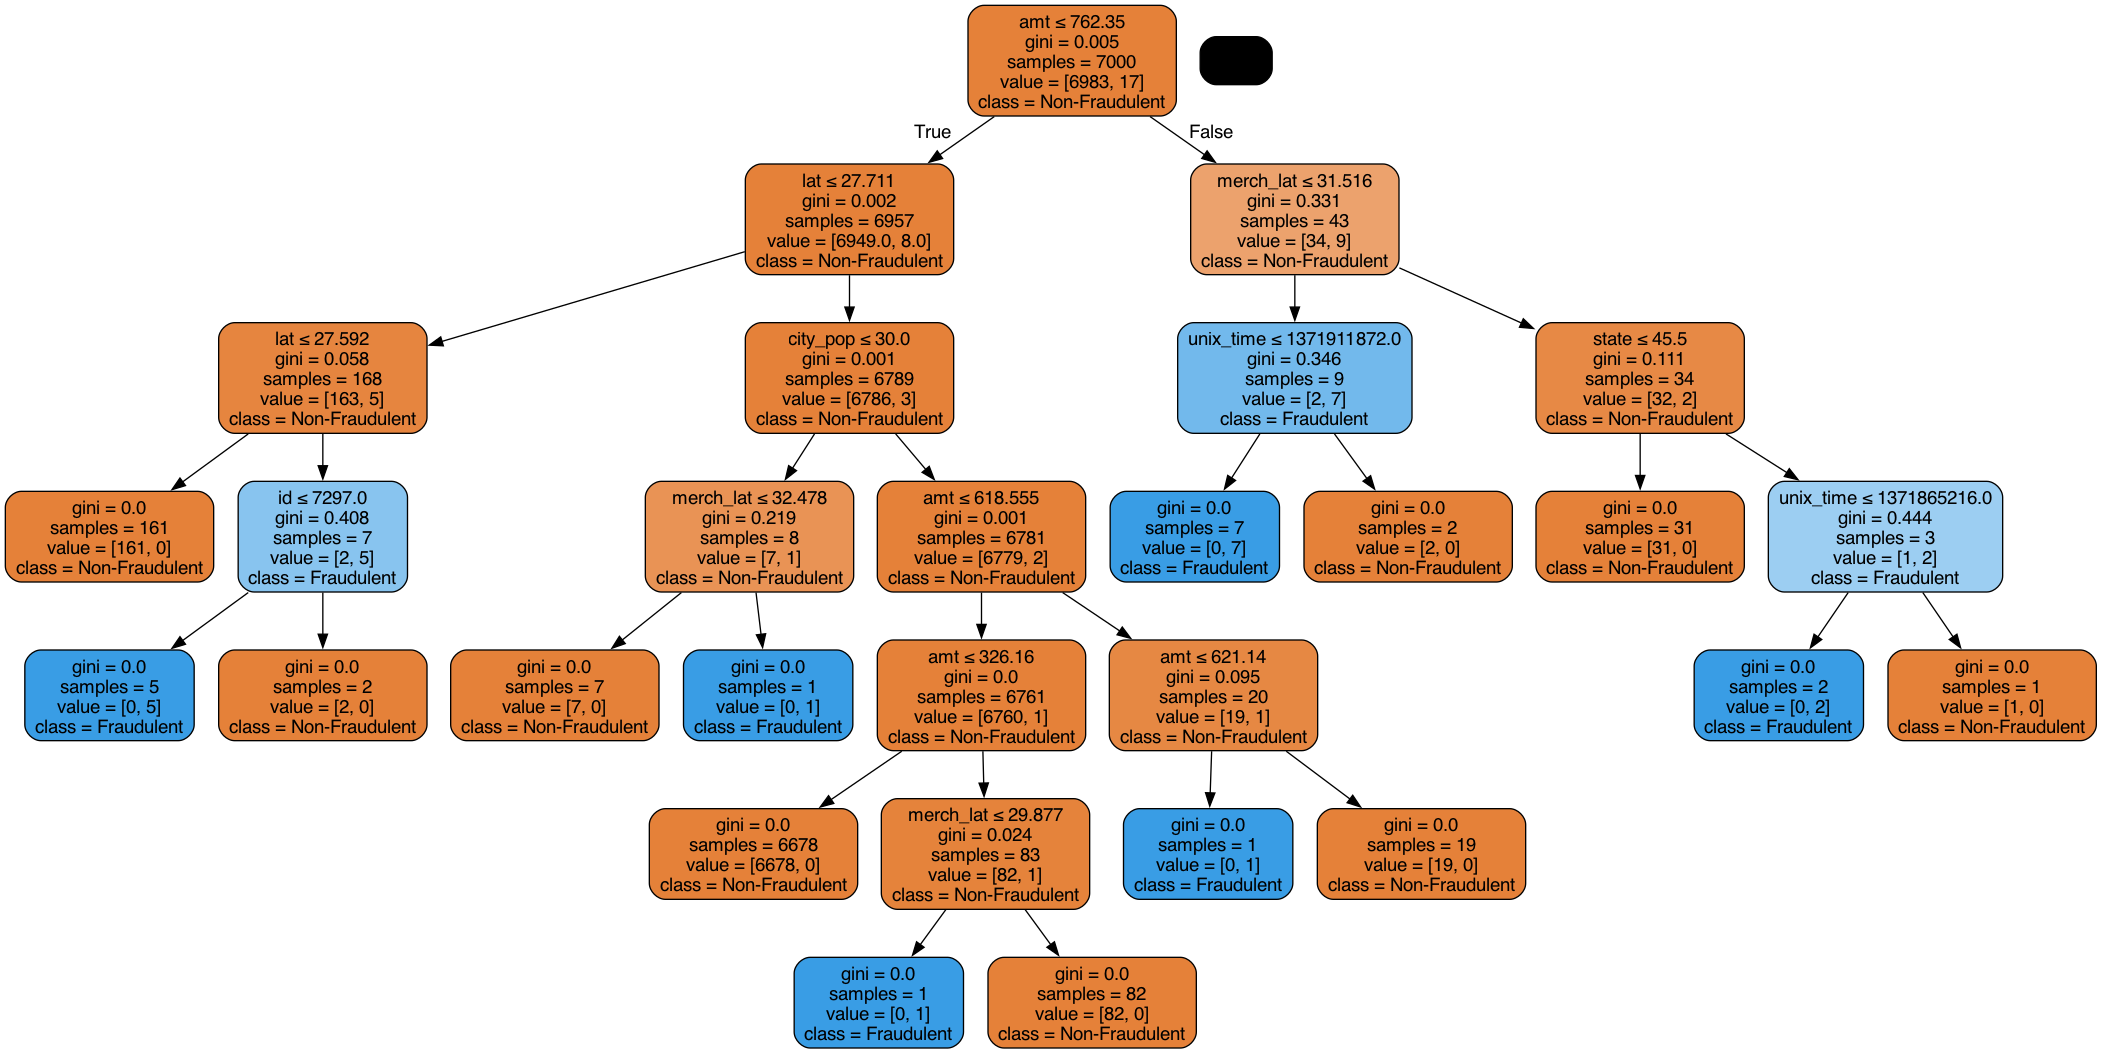

In [52]:
# Visualize the decision tree
feature_names = X.columns
class_names = ['Non-Fraudulent', 'Fraudulent']

dot_data = export_graphviz(model, out_file=None,
                           filled=True, rounded=True,
                           feature_names=feature_names,
                           class_names=class_names,
                           special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())


In [ ]:
### Calculate and Print the evaluation metrics

In [53]:

# Calculate the accurecy metrics
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')


Accuracy: 0.9987


In [54]:
# Generate and display the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)

Confusion Matrix:
[[2993    2]
 [   2    3]]
